In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf

In [81]:
import yfinance as yf

quotes = yf.download('^GDAXI', '2014-05-01', '2014-06-30')

[*********************100%***********************]  1 of 1 completed


In [88]:
quotes[:2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-02,9611.790039,9627.379883,9533.299805,9556.019531,9556.019531,88062300
2014-05-05,9536.379883,9548.169922,9407.089844,9529.500000,9529.500000,61911600


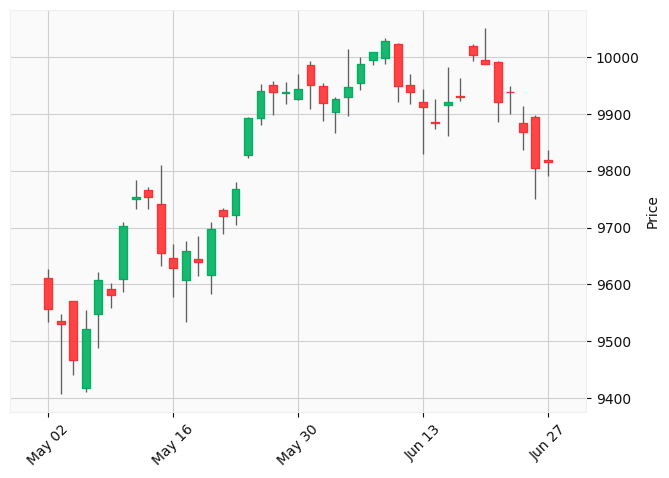

In [44]:
mpf.plot(quotes,type='candle', style='yahoo')

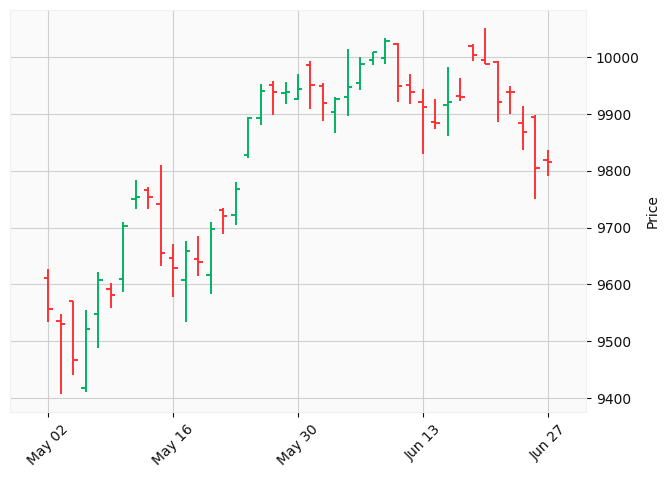

In [39]:
mpf.plot(quotes, style='yahoo')

In [89]:
quotes.index

DatetimeIndex(['2014-05-02', '2014-05-05', '2014-05-06', '2014-05-07',
               '2014-05-08', '2014-05-09', '2014-05-12', '2014-05-13',
               '2014-05-14', '2014-05-15', '2014-05-16', '2014-05-19',
               '2014-05-20', '2014-05-21', '2014-05-22', '2014-05-23',
               '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29',
               '2014-05-30', '2014-06-02', '2014-06-03', '2014-06-04',
               '2014-06-05', '2014-06-06', '2014-06-09', '2014-06-10',
               '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-16',
               '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20',
               '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26',
               '2014-06-27'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [93]:
day_list = []
name_list = []

for i, day in enumerate(quotes.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d'))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

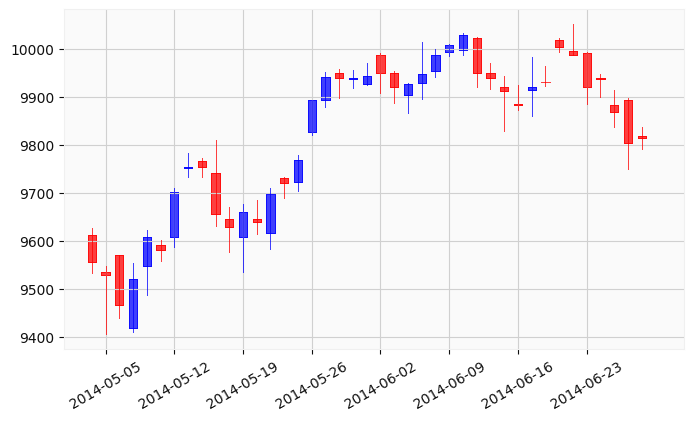

In [95]:
from mpl_finance import candlestick2_ohlc
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8,5))
fig.subplots_adjust(bottom=0.2)
candlestick2_ohlc(ax, quotes['Open'], quotes['High'],
                  quotes['Low'], quotes['Close'], width=0.6, colorup='b', colordown='r')
plt.grid(True)
ax.xaxis_date()

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

plt.setp(plt.gca().get_xticklabels(), rotation=30) # x축 라벨 30도 회전

In [107]:
quotes2 = yf.download('AAPL', '2014-05-01', '2014-06-30')
quotes2[:2]

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-05-01,21.142857,21.242857,20.941429,21.124287,18.705912,244048000
2014-05-02,21.155001,21.221430,21.061071,21.163570,18.740698,191514400


In [119]:
day_list = []
name_list = []

for i, day in enumerate(quotes2.index):
    if day.dayofweek == 0:
        day_list.append(i)
        name_list.append(day.strftime('%Y-%m-%d'))

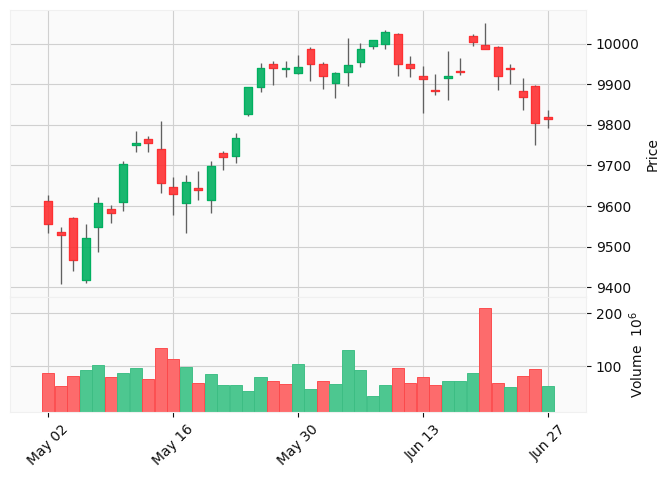

In [146]:
mpf.plot(quotes,type='candle', style='yahoo', volume=True)

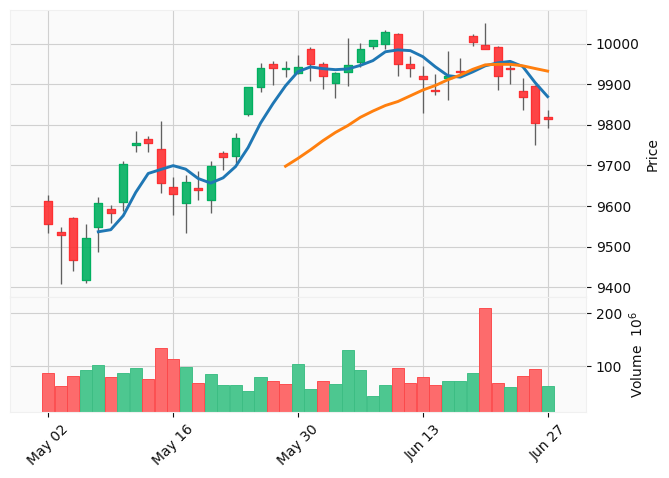

In [147]:
mpf.plot(quotes,type='candle', style='yahoo', mav=(5,20),volume=True)

In [152]:
strike = np.linspace(50,150,24)
ttm = np.linspace(0.5,2.5,24)
strike, ttm = np.meshgrid(strike, ttm)

In [153]:
strike[:2]

array([[ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ],
       [ 50.        ,  54.34782609,  58.69565217,  63.04347826,
         67.39130435,  71.73913043,  76.08695652,  80.43478261,
         84.7826087 ,  89.13043478,  93.47826087,  97.82608696,
        102.17391304, 106.52173913, 110.86956522, 115.2173913 ,
        119.56521739, 123.91304348, 128.26086957, 132.60869565,
        136.95652174, 141.30434783, 145.65217391, 150.        ]])

In [154]:
# 가짜 내재 변동성 생성
iv = (strike -100)**2 / (100*strike)/ttm

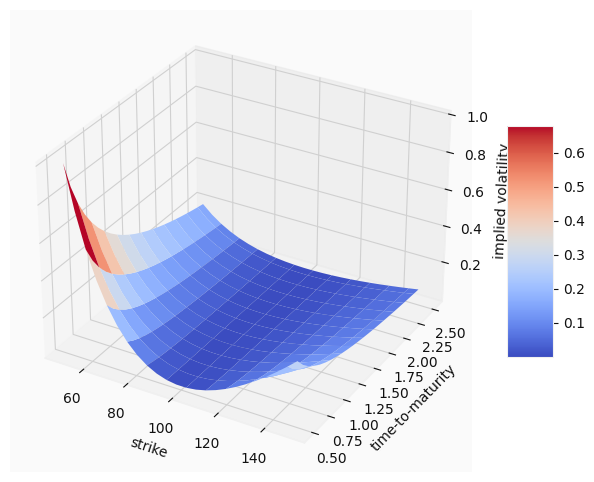

In [156]:
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                      cmap=plt.cm.coolwarm, linewidth=0.5,
                      antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

fig.colorbar(surf, shrink=0.5, aspect=5)

Text(0.5, 0, 'implied volatility')

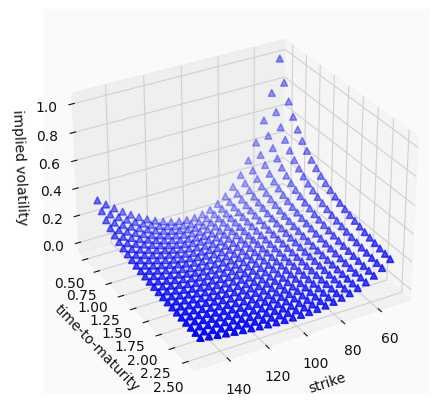

In [157]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111,projection='3d')
ax.view_init(30,60)

ax.scatter(strike, ttm, iv, zdir='z', s=25,
          c='b', marker='^')

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')